Time series analysis : ARIMA model


# 1. imoprts

In [1]:
import statsmodels.api as sm
import matplotlib
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
df = pd.read_excel('Sample - Superstore.xls')


In [2]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# 2. Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [5]:
furniture  = df.loc[df['Category']== 'Furniture']

In [6]:
furniture.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [7]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [8]:
furniture['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [9]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [10]:
furniture[furniture['Sales']==furniture['Sales'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8183,8184,CA-2017-155642,2017-05-18,2017-05-22,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Chicago,...,60653,Central,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,1.892,1,0.6,-0.9933


In [11]:
furniture[furniture['Sales']==furniture['Sales'].max()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7243,7244,CA-2017-118892,2017-08-17,2017-08-22,Second Class,TP-21415,Tom Prescott,Consumer,United States,Philadelphia,...,19134,East,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.174,9,0.3,-630.882


In [12]:
cols = ['Row ID',
        'Order ID',
        'Ship Date',
        'Ship Mode',
        'Customer ID',
        'Customer Name',
        'Segment',
        'Country',
        'City',
        'State',
        'Postal Code',
        'Region',
        'Product ID',
        'Category',
        'Quantity',
        'Discount',
        'Profit']


In [13]:
furniture.drop(cols,axis=1,inplace=True)

In [14]:
furniture = furniture.sort_values('Order Date')

In [15]:
furniture

,Order Date,Sub-Category,Product Name,Sales
7474,2014-01-06,Chairs,Global Deluxe High-Back Manager's Chair,2573.820
7660,2014-01-07,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728
866,2014-01-10,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940
716,2014-01-11,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940
2978,2014-01-13,Chairs,Global Highback Leather Tilter in Burgundy,545.940
...,...,...,...,...
7636,2017-12-29,Chairs,Harbour Creations Steel Folding Chair,258.750
7632,2017-12-29,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840
5131,2017-12-29,Furnishings,Nu-Dell Executive Frame,101.120
7635,2017-12-29,Chairs,"Global Leather and Oak Executive Chair, Black",300.980


In [16]:
furniture.isnull().sum()

Order Date      0
Sub-Category    0
Product Name    0
Sales           0
dtype: int64

## 2.1 Indexing With Time series data

In [17]:
furniture.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [18]:
furniture = furniture.set_index('Order Date')

In [19]:
y = furniture['Sales'].resample('MS').mean()
print(y['2017':])

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64


# 3. Visualizing Sales Time Series Data

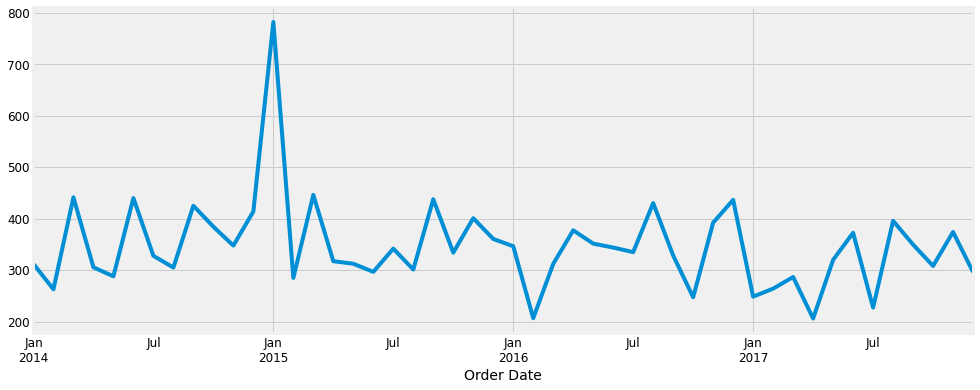

In [20]:
y.plot(figsize=(15,6))
plt.show()

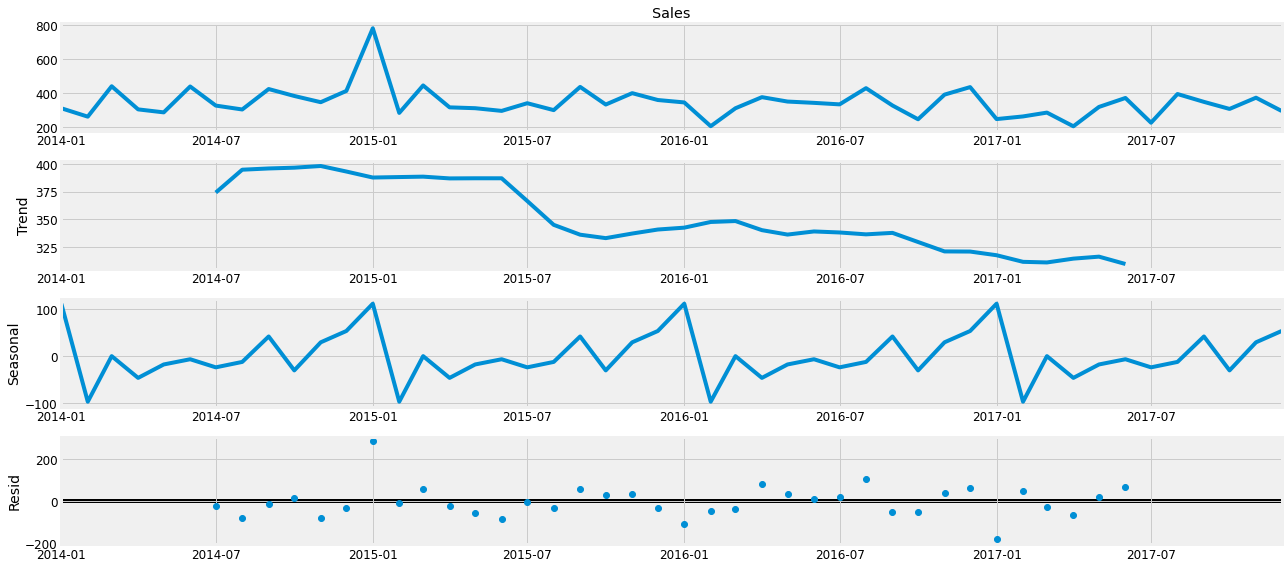

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y,model= 'addictive')
fig = decomposition.plot()
plt.show()

# 4. Time series forecasting with ARIMA

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA....')
print('SARIMAX : {} x {}'. format(pdq[1], seasonal_pdq[1]))
print('SARIMAX : {} x {}'. format(pdq[1], seasonal_pdq[2]))
print('SARIMAX : {} x {}'. format(pdq[2], seasonal_pdq[3]))
print('SARIMAX : {} x {}'. format(pdq[2], seasonal_pdq[4]))



Examples of parameter combinations for Seasonal ARIMA....
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 1, 0, 12)
SARIMAX : (0, 1, 0) x (0, 1, 1, 12)
SARIMAX : (0, 1, 0) x (1, 0, 0, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationary=False,
                                            enforce_invertibility=False)
            result = mod.fit()
            print('ARIMA {} x{} 23 -ARC:{}'.format(param,
                param_seasonal, result.aic))
        except:
            continue


ARIMA (0, 0, 0) x(0, 0, 0, 12) 23 -ARC:702.6705312928079
ARIMA (0, 0, 0) x(0, 0, 1, 12) 23 -ARC:2066.3940687783934
ARIMA (0, 0, 0) x(0, 1, 0, 12) 23 -ARC:453.97537874517474
ARIMA (0, 0, 0) x(0, 1, 1, 12) 23 -ARC:445.7034283802999
ARIMA (0, 0, 0) x(1, 0, 0, 12) 23 -ARC:628.5073497903171
ARIMA (0, 0, 0) x(1, 0, 1, 12) 23 -ARC:1815.480615750524
ARIMA (0, 0, 0) x(1, 1, 0, 12) 23 -ARC:449.85654362896173
ARIMA (0, 0, 0) x(1, 1, 1, 12) 23 -ARC:447.66543172411036
ARIMA (0, 0, 1) x(0, 0, 0, 12) 23 -ARC:668.14801793354
ARIMA (0, 0, 1) x(0, 0, 1, 12) 23 -ARC:1659.5251554228664
ARIMA (0, 0, 1) x(0, 1, 0, 12) 23 -ARC:455.4607930422625
ARIMA (0, 0, 1) x(0, 1, 1, 12) 23 -ARC:447.605234171494
ARIMA (0, 0, 1) x(1, 0, 0, 12) 23 -ARC:623.1645142919402
ARIMA (0, 0, 1) x(1, 0, 1, 12) 23 -ARC:2170.096798368069
ARIMA (0, 0, 1) x(1, 1, 0, 12) 23 -ARC:451.79486304204517
ARIMA (0, 0, 1) x(1, 1, 1, 12) 23 -ARC:449.54564411253466
ARIMA (0, 1, 0) x(0, 0, 0, 12) 23 -ARC:592.3531323020196
ARIMA (0, 1, 0) x(0, 0, 1, 

## 4.1 Fitting the ARIMA model

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = (1,1,1),
                                seasonal_order = (1,1,0,12),
                                enforce_stationary = False,
                                enforce_invertibility = False)
mod.fit()


In [25]:
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0159      0.251     -0.063      0.949      -0.508       0.476
ma.L1         -1.0000      0.233     -4.291      0.000      -1.457      -0.543
ar.S.L12      -0.4843      0.078     -6.213      0.000      -0.637      -0.332
sigma2      1.245e+04   1.87e-05   6.65e+08      0.000    1.24e+04    1.24e+04


## 4.2 Run model diagnostics to investigate any unusual behavior

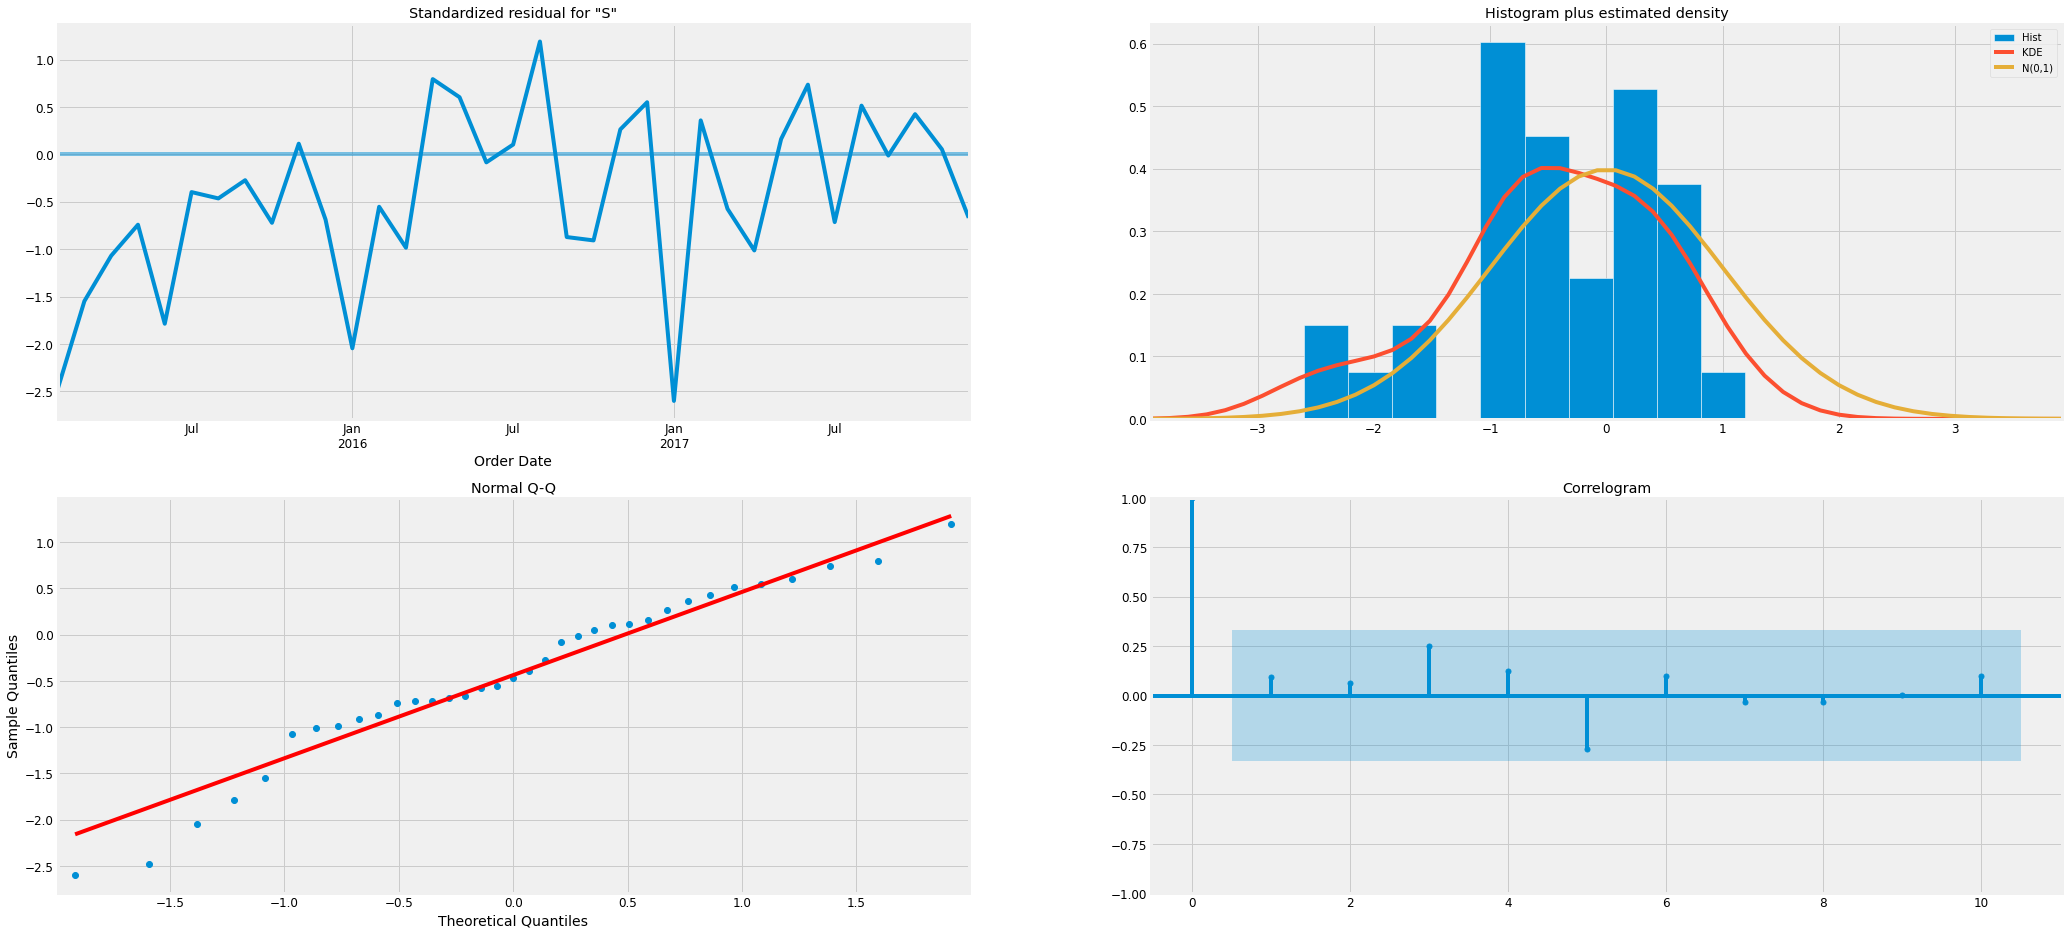

In [26]:
results.plot_diagnostics(figsize=(32,16))
plt.show()

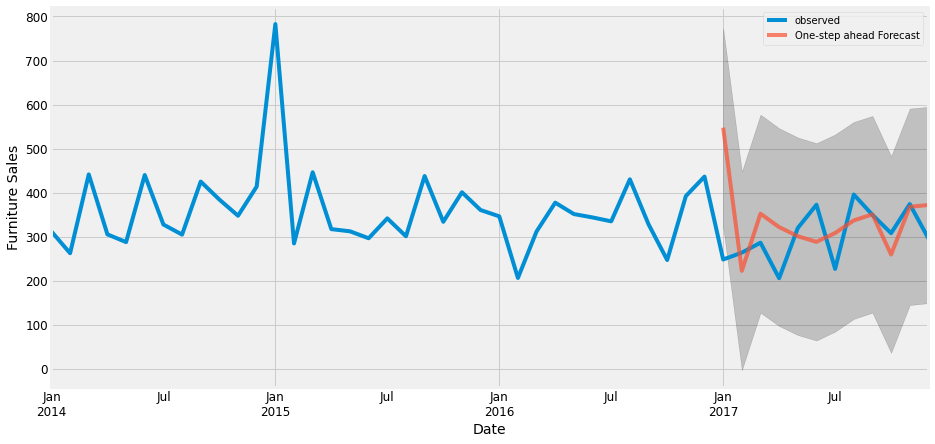

In [27]:
pred = results.get_prediction(
    start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
                         alpha=.7,
                         figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color = 'k',
                alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


## 4.3 Validating forcasts

In [28]:
y_forecasted = pred.predicted_mean
y_truth =  y['2017-01-01':]
mse = ((y_forecasted - y_truth)** 2).mean()
print('The Mean Square Error of the Forecast is {}'.format(round(mse,2)))
print('The Root Mean Square Error of our forecast is {}'.format(round(np.sqrt(mse),2)))

The Mean Square Error of the Forecast is 11222.26
The Root Mean Square Error of our forecast is 105.94


## 4.4 Producing and visualizing forecasts

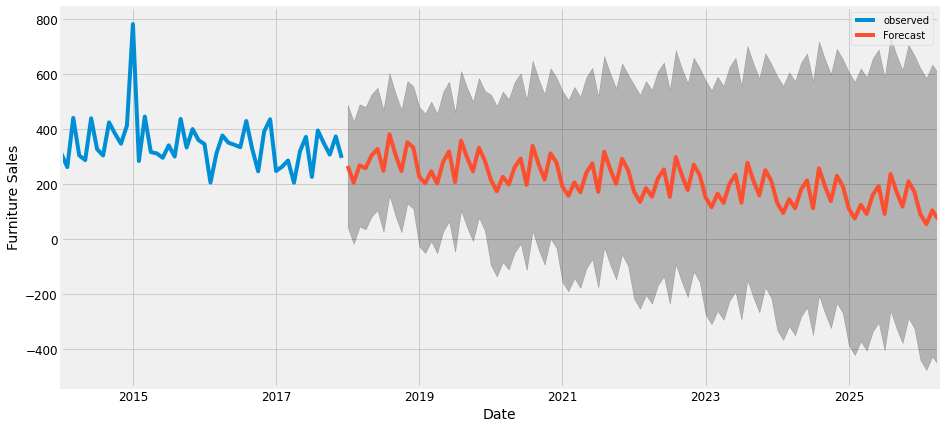

In [29]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


# 5. Comparing other categories

In [30]:
#comparing the model with other categories
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State', 
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True)
office.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office =office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

In [31]:
furniture.head(5)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [32]:
office.head(5)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [33]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date': y_furniture.index,
                          'Sales': y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index,
                       'Sales': y_office.values})
store = furniture.merge(office, how = 'inner',on='Order Date')
store.rename(columns = {'Sales_x':'furniture_sales','Sale_y':'office_sales'},inplace = True)
store.head()

,Order Date,furniture_sales,Sales_y
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


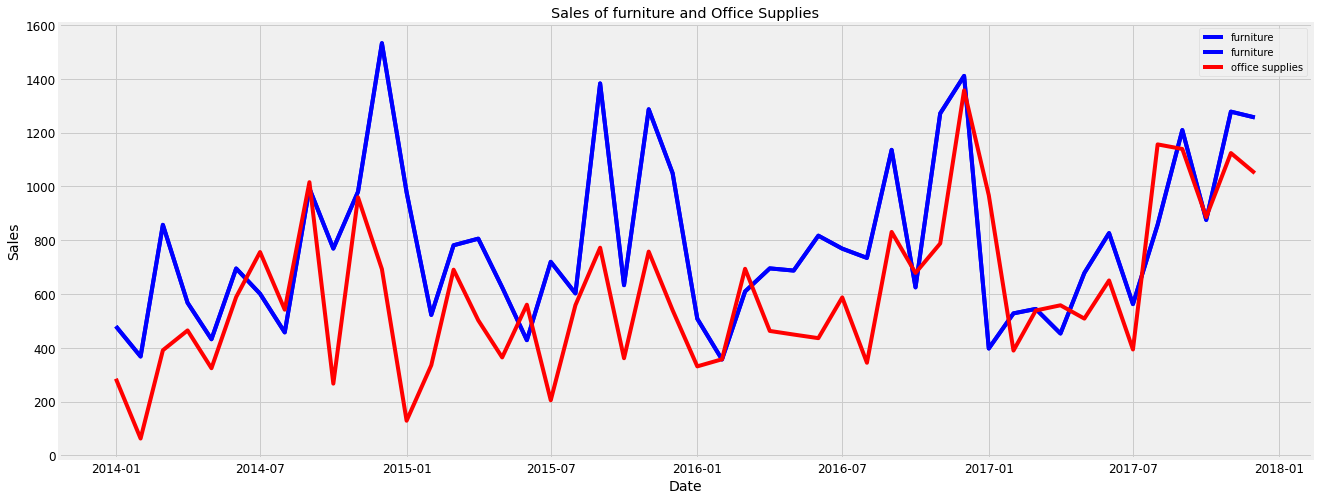

In [34]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],store['furniture_sales'],'b-',label = 'furniture')
plt.plot(store['Order Date'],store['furniture_sales'],'b-',label='furniture')
plt.plot(store['Order Date'], store['Sales_y'],
         'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and Office Supplies')
plt.legend()

# 7. Time Series Modeling with prophet

In [35]:
from prophet import Prophet

In [36]:
furniture = furniture.rename(columns ={'Oreder Date': 'ds','Sales':'y'})
furniture_model = Prophet(interval_width = 0.95)


In [37]:
furniture.head(2)

,Order Date,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600


In [38]:
furniture.rename(columns={'Order Date':'ds'},inplace=True)

In [39]:
furniture.head(2)

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600


In [40]:
furniture_model.fit(furniture)

16:56:44 - cmdstanpy - INFO - Chain [1] start processing
16:56:45 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
office.head(2)

,Order Date,Sales
0,2014-01-01,285.357647
1,2014-02-01,63.042588


In [42]:
office = office.rename(columns={'Order Date':'ds','Sales':'y'})
office.head(2)

,ds,y
0,2014-01-01,285.357647
1,2014-02-01,63.042588


In [43]:
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

16:56:45 - cmdstanpy - INFO - Chain [1] start processing
16:56:46 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36,freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36,freq='MS')
office_forecast = office_model.predict(office_forecast)


Text(0.5, 1.0, 'Furniture Sales')

<Figure size 720x432 with 0 Axes>

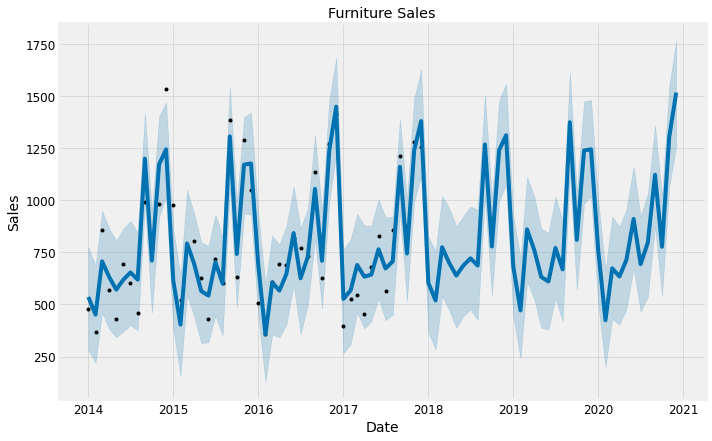

In [45]:
plt.figure(figsize=(10,6))
furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='Sales')
plt.title('Furniture Sales')

Text(0.5, 1.0, 'Office Sales')

<Figure size 720x432 with 0 Axes>

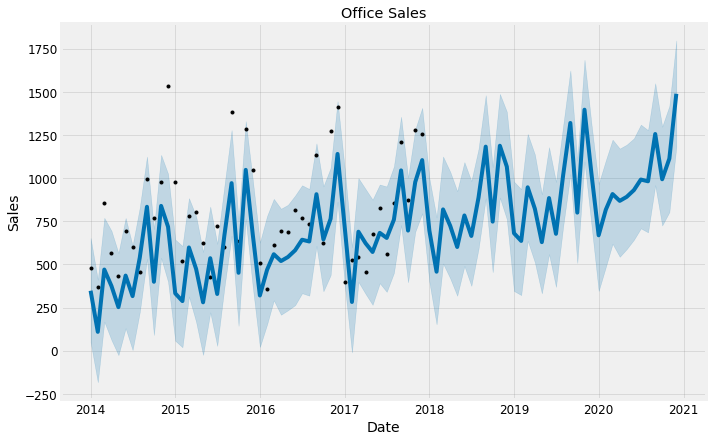

In [46]:
plt.figure(figsize=(10, 6))
furniture_model.plot(office_forecast, xlabel='Date', ylabel='Sales')
plt.title('Office Sales')


# 8. Compare Forecasts

In [48]:
furniture_names = ['furniture_%s' %
                    column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(furniture_forecast, merge_office_forecast,
                    how='inner', left_on='furniture_ds', right_on='office_ds')
forecast = forecast.rename(
    columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()


,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.058109,281.420337,774.456486,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,727.494421,219.270764,686.231552,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,728.791734,460.202713,948.830232,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,730.228046,380.733223,862.813330,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,731.618025,342.526688,806.552263,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409
